In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sbn


In [91]:
data = pd.read_csv(r"C:\Users\Dheeraj Rane\Downloads\Real estate.csv")
data.corr()

,No,transaction_date,house_age,nearest_MRT_station,convenience_stores,latitude,longitude,house_price
No,1.000000,-0.102667,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
transaction_date,-0.102667,1.000000,0.012358,0.159193,-0.053872,-0.064621,-0.115547,0.020810
house_age,-0.032808,0.012358,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
nearest_MRT_station,-0.013573,0.159193,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
convenience_stores,-0.012699,-0.053872,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,-0.010110,-0.064621,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.011059,-0.115547,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price,-0.028587,0.020810,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [14]:
data.isnull().sum()

No                     0
transaction_date       0
house_age              0
nearest_MRT_station    0
convenience_stores     0
latitude               0
longitude              0
house_price            0
dtype: int64

<AxesSubplot:ylabel='convenience_stores'>

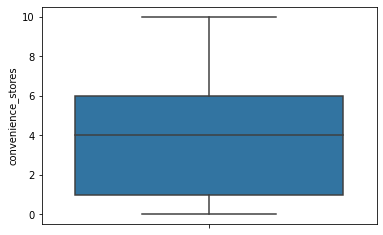

In [29]:
sbn.boxplot(y='convenience_stores',data=data)


In [23]:
q3= data['nearest_MRT_station'].quantile(0.75) 
q1= data['nearest_MRT_station'].quantile(0.25)
IQR = q3-q1

upper_limit = q3+1.5*IQR
upper_limit

data['nearest_MRT_station'] = np.where(data['nearest_MRT_station']>upper_limit,upper_limit,data['nearest_MRT_station'])



In [27]:
q3= data['house_price'].quantile(0.75) 
q1= data['house_price'].quantile(0.25)
IQR = q3-q1

upper_limit = q3+1.5*IQR
upper_limit

data['house_price'] = np.where(data['house_price']>upper_limit,upper_limit,data['house_price'])


In [38]:
data1 = data.loc[:,['house_price','nearest_MRT_station','convenience_stores']]
data1

,house_price,nearest_MRT_station,convenience_stores
0,37.9,84.87882,10
1,42.2,306.59470,9
2,47.3,561.98450,5
3,54.8,561.98450,5
4,43.1,390.56840,5
...,...,...,...
409,15.4,3201.71030,0
410,50.0,90.45606,9
411,40.6,390.96960,7
412,52.5,104.81010,5


In [39]:
data1.isnull().sum()

house_price            0
nearest_MRT_station    0
convenience_stores     0
dtype: int64

In [65]:
y1 = data1[['house_price']]
y1

,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [58]:
x = data1[['nearest_MRT_station','convenience_stores']]
x 

,nearest_MRT_station,convenience_stores
0,84.87882,10
1,306.59470,9
2,561.98450,5
3,561.98450,5
4,390.56840,5
...,...,...
409,3201.71030,0
410,90.45606,9
411,390.96960,7
412,104.81010,5


In [62]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y1,train_size=0.80,random_state=100)
y_train

,house_price
272,40.5
390,38.6
69,42.0
325,38.1
199,31.6
...,...
343,46.6
359,24.7
323,42.5
280,45.4


In [72]:
new = pd.concat([x_train,y_train],axis=1)
new 

,nearest_MRT_station,convenience_stores,house_price
272,492.2313,5,40.5
390,377.8302,9,38.6
69,561.9845,5,42.0
325,488.8193,8,38.1
199,451.6419,8,31.6
...,...,...,...
343,563.2854,8,46.6
359,2408.9930,0,24.7
323,197.1338,6,42.5
280,184.3302,6,45.4


In [73]:
new.corr()

,nearest_MRT_station,convenience_stores,house_price
nearest_MRT_station,1.000000,-0.633482,-0.714283
convenience_stores,-0.633482,1.000000,0.573657
house_price,-0.714283,0.573657,1.000000


<AxesSubplot:>

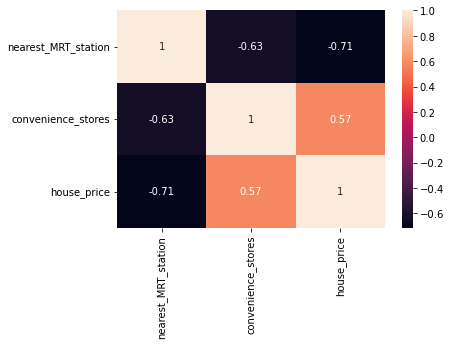

In [79]:
sbn.heatmap(new.corr(),annot=True)

<AxesSubplot:xlabel='nearest_MRT_station', ylabel='house_price'>

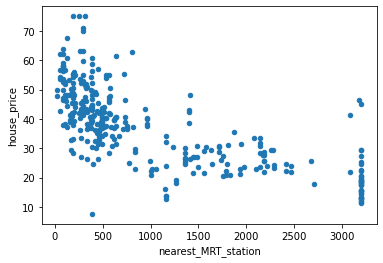

In [78]:
new.plot.scatter(x='nearest_MRT_station',y='house_price')

###### nearest_MRT_station 63% negative impact on price

In [81]:
import statsmodels.formula.api as sfa 


In [84]:
result = sfa.ols('house_price ~ nearest_MRT_station + convenience_stores',data=new).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            house_price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     188.5
Date:                Thu, 12 May 2022   Prob (F-statistic):           3.20e-55
Time:                        20:04:50   Log-Likelihood:                -1198.9
No. Observations:                 331   AIC:                             2404.
Df Residuals:                     328   BIC:                             2415.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              41.7533      1.457     28.655      0.000      38.887      44.620
nearest_MRT_station    -0.0078      0.001    -12.040      0.000      -0.009      -0.007
convenience_stores      0.8932      0.215      4.158      0.000       0.471       1.316
==============================================================================
Omnibus:                       32.569   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.555
Skew:                           0.567   Prob(JB):                     7.09e-14
Kurtosis:                       4.762   Cond. No.                     4.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
df = pd.read_excel(r"C:\Users\Dheeraj Rane\Downloads\Car Price Prediction.xlsx")

In [92]:
df.head()


,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Resale
0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,16.360
1,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,19.875
2,35.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,18.225
3,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,29.725
4,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,22.255


In [93]:
df.isnull().sum()


Price in thousands    0
Engine size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb weight           0
Fuel capacity         0
Fuel efficiency       0
Resale                0
dtype: int64

<AxesSubplot:ylabel='Resale'>

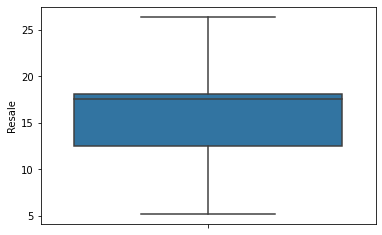

In [109]:
sbn.boxplot(y='Resale',data=df)

In [103]:
q3= df['Price in thousands'].quantile(0.75) 
q1= df['Price in thousands'].quantile(0.25)
IQR = q3-q1

upper_limit = q3+1.5*IQR
upper_limit

df['Price in thousands'] = np.where(df['Price in thousands']>upper_limit,upper_limit,df['Price in thousands'])


In [105]:
q3= df['Horsepower'].quantile(0.75) 
q1= df['Horsepower'].quantile(0.25)
IQR = q3-q1

upper_limit = q3+1.5*IQR
upper_limit

df['Horsepower'] = np.where(df['Horsepower']>upper_limit,upper_limit,df['Horsepower'])


In [108]:
q3= df['Resale'].quantile(0.75) 
q1= df['Resale'].quantile(0.25)
IQR = q3-q1

upper_limit = q3+1.5*IQR
upper_limit

df['Resale'] = np.where(df['Resale']>upper_limit,upper_limit,df['Resale'])

In [112]:
y = df[['Price in thousands']]
x = df[['Horsepower','Resale']]
y 

,Price in thousands
0,21.50
1,28.40
2,35.00
3,42.00
4,23.99
...,...
151,24.40
152,27.50
153,28.80
154,45.50


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=101)
x_train

,Horsepower,Resale
64,227.0,19.690000
98,302.0,18.061000
50,200.0,14.210000
21,175.0,10.310000
22,180.0,11.525000
...,...,...
63,148.0,8.910000
70,225.0,26.410625
81,210.0,16.575000
11,240.0,13.740000


In [145]:
new4 = pd.concat([y_train,x_train],axis=1)
new4



,Price in thousands,Horsepower,Resale
64,29.4650,227.0,19.690000
98,53.5125,302.0,18.061000
50,22.1950,200.0,14.210000
21,18.8900,175.0,10.310000
22,19.3900,180.0,11.525000
...,...,...,...
63,14.9990,148.0,8.910000
70,37.8050,225.0,26.410625
81,24.9970,210.0,16.575000
11,25.3000,240.0,13.740000


In [143]:
new4.corr()


,Price in thousands,Horsepower,Resale
Price in thousands,1.000000,0.888683,0.817468
Horsepower,0.888683,1.000000,0.706432
Resale,0.817468,0.706432,1.000000


<AxesSubplot:>

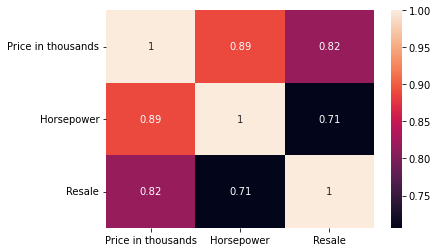

In [146]:
sbn.heatmap(new4.corr(),annot=True)

<AxesSubplot:xlabel='Price in thousands', ylabel='Horsepower'>

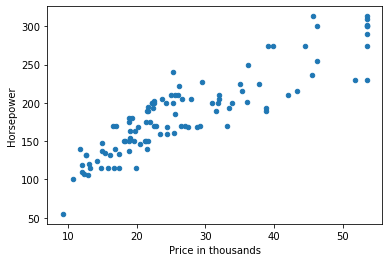

In [138]:
new4.plot.scatter(x='Price in thousands', y='Horsepower')

###### horsepower is 89% strong positive correlation with price
there is colinearity between data

In [124]:
import statsmodels.formula.api as sfa

In [149]:
result1 = sfa.ols('Price in thousands ~ Horsepower + Resale',data=new4).fit()

PatsyError: Error evaluating factor: NameError: name 'Price' is not defined
    Price in thousands ~ Horsepower + Resale
    ^^^^^^^^^^^^^^^^^^